In [180]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import glob 
import seaborn as sns 
import os

In [13]:
s_path = glob.glob('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_d4aee54_a_interm_cancer/interm_cancer_ref_combiExprCohortLim0.0Across1ExceptTCGABHA18V01A11RA12D07all.tsv/*part*')

In [19]:
shareness = []
for path in s_path: 
    shareness.append(pd.read_csv(path, sep = '\t', header = None))

In [20]:
shareness = pd.concat(shareness, axis = 0 )

In [22]:
shareness.columns = ['kmer', 'recurrence']

In [23]:
shareness.head()


,kmer,recurrence
0,TCPSSQEPA,1
1,ATSLAAVVT,8
2,ALAGGCECD,18
3,AGGCECDNA,18
4,PDDFKGYGE,17


save to /cluster/work/grlab/projects/projects2020_OHSU/plots/shareness/eth_TCGA-BH-A18V-01A-11R-A12D-07.all_hist_RecurrencePlot.pdf


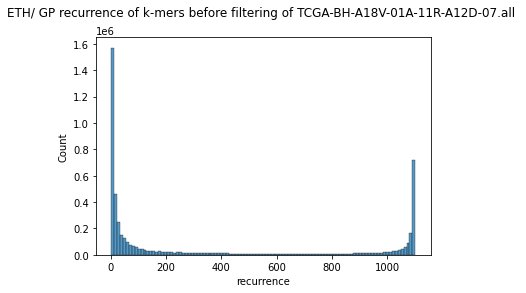

In [192]:
sns.histplot(data = shareness, x = 'recurrence')
plt.title(f'ETH/ GP recurrence of k-mers before filtering of TCGA-BH-A18V-01A-11R-A12D-07.all \n ')

save_path = os.path.join(plot_dir, 
                    '{}_{}_{}_RecurrencePlot.pdf'.format(
                     'eth', 
                     'TCGA-BH-A18V-01A-11R-A12D-07.all', 
                      'hist' )) 
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')

In [38]:
single = glob.glob('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_d4aee54_GTEXcore/G_TCGA-BH-A18V-01A-11R-A12D-07.all_ref_SampleLim2.0CohortLim0.0Across1000_FiltNormalsGtexcoreCohortlim0.0Across0_FiltUniprot.tsv/*part*')[0]

single = pd.read_csv(single, sep = '\t')

In [37]:
single = pd.read_csv(single, sep = '\t')

In [39]:
single.head()

,kmer,TCGABHA18V01A11RA12D07all,kmer_IL_eq
0,AAGDDENHN,465.0,AAGDDENHN
1,AAMGIKSCA,2188.0,AAMGLKSCA
2,AAPGQHLQA,49.0,AAPGQHLQA
3,AGNIWILSV,122.0,AGNLWLLSV
4,AGPDWIIAI,30.0,AGPDWLLAL


In [40]:
single = pd.merge(single, shareness, how = 'left', on = 'kmer')

In [41]:
single.head()

,kmer,TCGABHA18V01A11RA12D07all,kmer_IL_eq,recurrence
0,AAGDDENHN,465.0,AAGDDENHN,1101
1,AAMGIKSCA,2188.0,AAMGLKSCA,1100
2,AAPGQHLQA,49.0,AAPGQHLQA,1101
3,AGNIWILSV,122.0,AGNLWLLSV,1067
4,AGPDWIIAI,30.0,AGPDWLLAL,1080


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

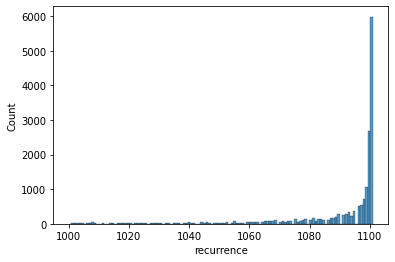

In [42]:
sns.histplot(data = single, x = 'recurrence')

In [ ]:
#We have 1102 candidates 

In [45]:
test_kmers = single.loc[single['recurrence'] == 1101, 'kmer']

In [48]:
test_kmers.head()


0     AAGDDENHN
2     AAPGQHLQA
5     AHTCERIIP
7     AKLPIYGYV
10    AMNPVEHPR
Name: kmer, dtype: object

In [47]:
test_kmers.to_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/shareness/TCGA-BH-A18V-01A-11R-A12D-07_1101shared_filtered.tsv', index = None, header = None)

In [ ]:
# for kmer in $(cut -f1 shareness/TCGA-BH-A18V-01A-11R-A12D-07_1101shared_filtered.tsv) ; do echo ${kmer},$(grep $kmer cohort_mutNone/meta_peptide_pooled_pq.tsv) >> shareness/TCGA-BH-A18V-01A-11R-A12D-07_1101shared_filtered_metadata.tsv; done

In [182]:
save = True
plot_dir = '/cluster/work/grlab/projects/projects2020_OHSU/plots'
plot_dir = os.path.join(plot_dir, 'shareness')
#os.mkdir(plot_dir)
base_plot = 'v2_v2.5f0752a_conf2_BRCA'
global plot_dir
global base_plot

In [100]:
ohsu_path = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/shareness/ohsu_shared_test2'

ohsu = pd.read_csv(ohsu_path, sep = ',')

ohsu.head()

ohsu['normal_cohort_id'].unique()

eth_path = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/shareness/eth_shared_test2'

eth = pd.read_csv(eth_path)

eth.head()

In [183]:
def plot_range(x, plot_samp_sup_eth, plot_samp_sup_ohsu, save):
    plt.scatter(plot_samp_sup_eth[x], 
            plot_samp_sup_eth['Filter_Sample_Cohort_CohortNormal_Uniprot'], color = 'green')
    plt.title(f'ETH/ GP Number of kmers after filtering of TCGA-BH-A18V-01A-11R-A12D-07.all')
    plt.ylabel(f'Number of kmers after filtering')
    plt.xlabel(f'varying {x}, holding other parameters constant')
    save_path = os.path.join(plot_dir, 
                        '{}_{}_{}_SharenessPlot.pdf'.format(
                         'eth', 
                         'TCGA-BH-A18V-01A-11R-A12D-07.all', 
                          x )) 
    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    
    plt.scatter(plot_samp_sup_ohsu[x], 
        plot_samp_sup_ohsu['Filter_Sample_Cohort_CohortBackground_Uniprot'], color = 'magenta')
    plt.title(f'OHSU/JP Number of kmers after filtering of TCGA-BH-A18V-01A-11R-A12D-07.all')
    plt.ylabel(f'Number of kmers after filtering')
    plt.xlabel(f'varying {x}, holding other parameters constant')
    save_path = os.path.join(plot_dir, 
                        '{}_{}_{}_SharenessPlot.pdf'.format(
                         'ohsu', 
                         'TCGA-BH-A18V-01A-11R-A12D-07.all', 
                          x )) 
    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

In [184]:
plot_samp_sup_eth = eth.loc[(eth['min_sample_reads'] == 2) & 
                            (eth['reads_per_cohort_sample'] == 0) 
        &( eth['#_normal_samples_allowed'] == 0) & 
                            (eth['normal_cohort_id'] == 'Gtexcore')
        & (eth['reads_per_normal_sample'] == 0) ]

In [185]:
plot_samp_sup_ohsu = ohsu.loc[(ohsu['min_sample_reads'] == 2) & 
                              (ohsu['reads_per_cohort_sample'] == 0) 
                            &( ohsu['#_normal_samples_allowed'] == 0) 
                                & (ohsu['normal_cohort_id'] == 'core_GTEx')
                                & (ohsu['reads_per_normal_sample'] == 0) ]

save to /cluster/work/grlab/projects/projects2020_OHSU/plots/shareness/eth_TCGA-BH-A18V-01A-11R-A12D-07.all_#_of_cohort_samples_SharenessPlot.pdf


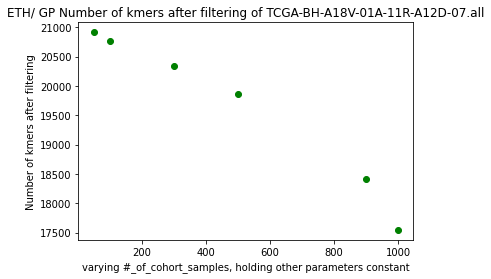

save to /cluster/work/grlab/projects/projects2020_OHSU/plots/shareness/ohsu_TCGA-BH-A18V-01A-11R-A12D-07.all_#_of_cohort_samples_SharenessPlot.pdf


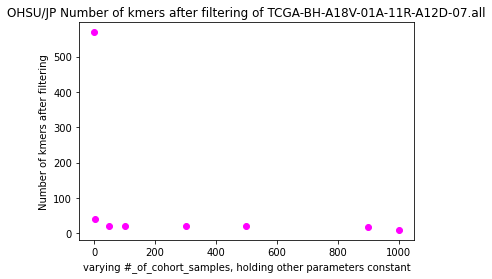

In [186]:
plot_range('#_of_cohort_samples', plot_samp_sup_eth, plot_samp_sup_ohsu, save)

In [187]:
plot_samp_sup_eth = eth.loc[(eth['#_of_cohort_samples'] == 2) & (eth['reads_per_cohort_sample'] == 0) 
        &( eth['#_normal_samples_allowed'] == 0) & (eth['normal_cohort_id'] == 'Gtexcore')
        & (eth['reads_per_normal_sample'] == 0) ]

In [188]:
plot_samp_sup_ohsu = ohsu.loc[(ohsu['#_of_cohort_samples'] == 2) & 
                              (ohsu['reads_per_cohort_sample'] == 0) 
                            &( ohsu['#_normal_samples_allowed'] == 0) 
                                & (ohsu['normal_cohort_id'] == 'core_GTEx')
                                & (ohsu['reads_per_normal_sample'] == 0) ]

save to /cluster/work/grlab/projects/projects2020_OHSU/plots/shareness/eth_TCGA-BH-A18V-01A-11R-A12D-07.all_min_sample_reads_SharenessPlot.pdf


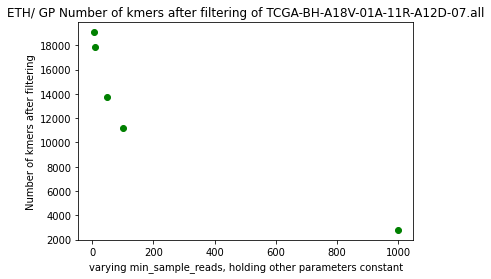

save to /cluster/work/grlab/projects/projects2020_OHSU/plots/shareness/ohsu_TCGA-BH-A18V-01A-11R-A12D-07.all_min_sample_reads_SharenessPlot.pdf


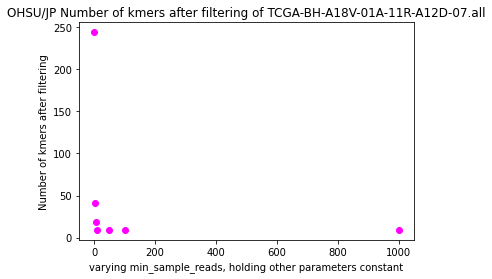

In [189]:
plot_range('min_sample_reads', plot_samp_sup_eth, plot_samp_sup_ohsu, save)